In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']=''
%run -i imports.py
jax.config.update('jax_platform_name', 'cpu')
%run -i config.py
config.lamp_substep = 4
%run -i model.py
%run -i shax.py

2022-12-27 22:27:28.143430: E external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [2]:
init_batch = [init() for _ in range(config.shac_N)]
init_batch = state_t(
    *(np.stack(p) for p in zip(*init_batch))
)
theta = policy_net.init(jax.random.PRNGKey(0), jax.vmap(observe)(init_batch))
phi = value_net.init(jax.random.PRNGKey(0), jax.vmap(observe)(init_batch))

with open('weights/xtheta-0.5.bin', 'rb') as f:
    theta = flax.serialization.from_bytes(theta, f.read())

with open('weights/xphi-0.5.bin', 'rb') as f:
    phi = flax.serialization.from_bytes(phi, f.read())

In [3]:
mdp = mdp_t(make_init(0.5), observe, step, terminate)

bounds = (1.6, 2.2)

@jax.jit
def cost(schedule, s, z):
    def loop(t_, x):
        t = (t_ + z * len(schedule)) / 500
        # t = np.clip(t, 0, 1)
        s, out = x

        a = policy_net.apply(theta, mdp.observe(s)[None, ...])[0]
        v = value_net.apply(phi, mdp.observe(s)[None, ...])[0]
        a = schedule[t_] + a[0] # * a[1] + a[0]
        s = mdp.step(s, a)

        out = out + 0.01 * np.mean(s.vs ** 2)
        out = out - v / 1000 * (0.5 - (t > bounds[0]) * (t < bounds[1]))
        out = out + 10. * (jax.nn.relu(1500 - v) / 1000)
        return s, out

    s, out = jax.lax.fori_loop(0, len(schedule), loop, (s, 0))
    out = out / len(schedule)
    out = out + 0.1 * np.mean(np.abs(schedule) ** 2) * 0.5
    return out, s
dcost = jax.value_and_grad(cost, has_aux=True)

0


  0%|          | 0/501 [00:00<?, ?it/s]

-0.8092293242799924
-0.8283435913886511
-0.8145074248401561
-0.8128514215356053
-0.809759792607726
-0.8064348182918768


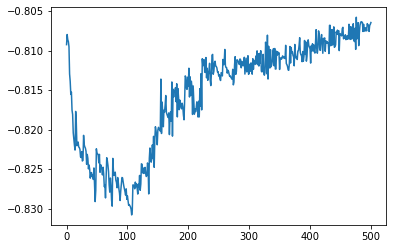

  0%|          | 0/100 [00:00<?, ?it/s]

1


  0%|          | 0/501 [00:00<?, ?it/s]

-0.9205614362796672
-0.9249815469192909
-0.9223184115037554
-0.9202294736484405
-0.9174238777403696
-0.9140495712794835


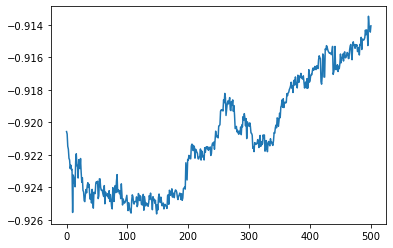

  0%|          | 0/200 [00:00<?, ?it/s]

2


  0%|          | 0/501 [00:00<?, ?it/s]

-0.949103641418092
-0.9778254687783957
-0.9804526183029348
-0.9830107087340458
-0.9847998261557454
-0.9850759787963321


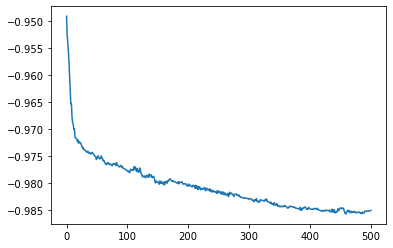

  0%|          | 0/300 [00:00<?, ?it/s]

3


  0%|          | 0/501 [00:00<?, ?it/s]

-1.0020541708824304
-1.026684932910289
-1.038540754311477
-1.0395034463977255
-1.0401067301645226
-1.0408382000767977


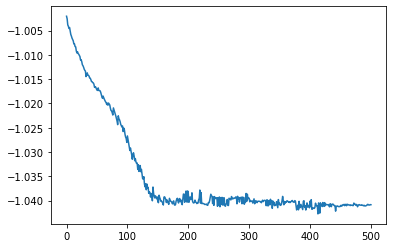

  0%|          | 0/400 [00:00<?, ?it/s]

4


  0%|          | 0/501 [00:00<?, ?it/s]

-0.9607178908455702
-0.9705943270135552
-0.9717112177270788
-0.9786616219951516
-1.0048830623254539
-1.0327447952787745


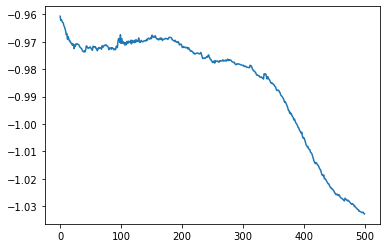

  0%|          | 0/500 [00:00<?, ?it/s]

5


  0%|          | 0/501 [00:00<?, ?it/s]

-1.0144075870383555
-1.033672544989463
-1.044193991152212
-1.0517029575194388
-1.0536358873371106
-1.0527998520684108


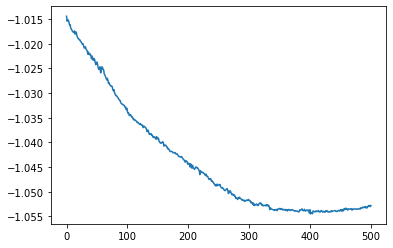

  0%|          | 0/600 [00:00<?, ?it/s]

6


  0%|          | 0/501 [00:00<?, ?it/s]

-0.9709459052839483
-0.9857627626313409
-0.990271437936498
-0.9925766451350825
-0.9968553716947338
-0.9973491036845448


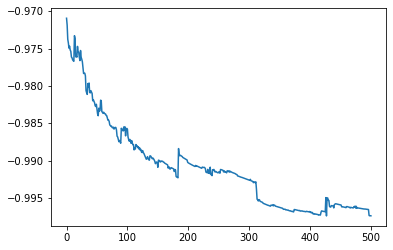

  0%|          | 0/700 [00:00<?, ?it/s]

7


  0%|          | 0/501 [00:00<?, ?it/s]

-0.9304046625469952
-0.96355032513294
-0.9573048312210753
-0.9557665651863292
-0.9552885284596853
-0.9549088803151752


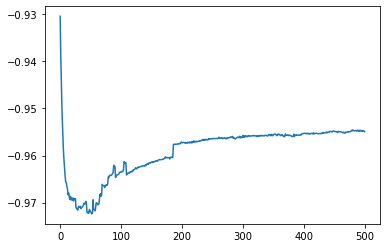

  0%|          | 0/800 [00:00<?, ?it/s]

8


  0%|          | 0/501 [00:00<?, ?it/s]

1.0281088063576471
0.9337131722040342
0.9304581644536452
0.9259405297330242
0.9075036166780469
0.8794848223992272


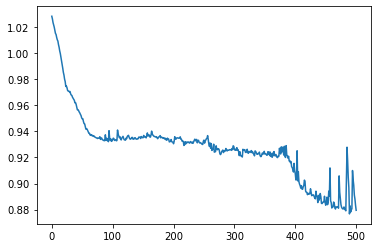

  0%|          | 0/900 [00:00<?, ?it/s]

9


  0%|          | 0/501 [00:00<?, ?it/s]

1.2782649735647071
1.2517989980875004
1.2455651410564177
1.2770737347795775
1.2675600269597567
1.2920735109323298


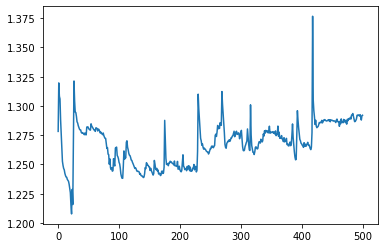

  0%|          | 0/1000 [00:00<?, ?it/s]

10


  0%|          | 0/501 [00:00<?, ?it/s]

0.8623999753164255
0.7919086632987753
0.7903627065583873
0.7903881651297965
0.7909805741644832
0.7926817403106202


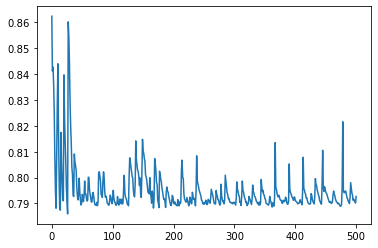

  0%|          | 0/1100 [00:00<?, ?it/s]

11


  0%|          | 0/501 [00:00<?, ?it/s]

-0.8383947631241533
-0.8457616778400814
-0.8505001546615621
-0.8503161905359392
-0.846983148226173
-0.8446014391174987


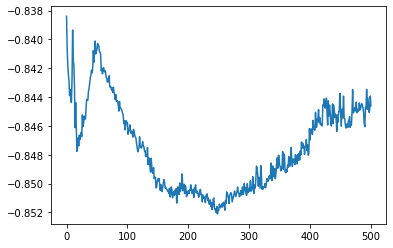

  0%|          | 0/1200 [00:00<?, ?it/s]

12


  0%|          | 0/501 [00:00<?, ?it/s]

-0.946668227658763
-0.9966066793618833
-1.0019574742771682
-1.003059635187399
-1.0028038605263987
-1.0018781147116749


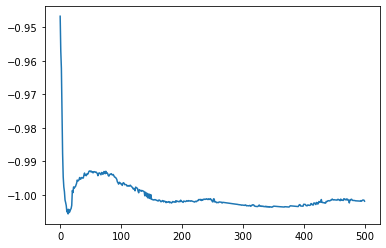

  0%|          | 0/1300 [00:00<?, ?it/s]

13


  0%|          | 0/501 [00:00<?, ?it/s]

-0.9618282503228073
-0.964355725956156
-0.963915675849422
-0.9623884975378952
-0.9575421224421921
-0.9477766514538812


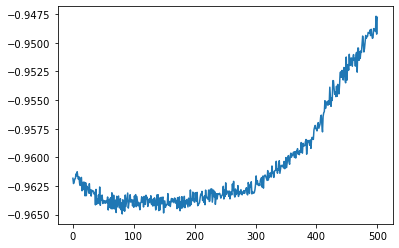

  0%|          | 0/1400 [00:00<?, ?it/s]

14


  0%|          | 0/501 [00:00<?, ?it/s]

-1.040135832662292
-1.0366149805125213
-1.0339802199362704
-1.0305772694044761
-1.0277771523977017
-1.0235026434173278


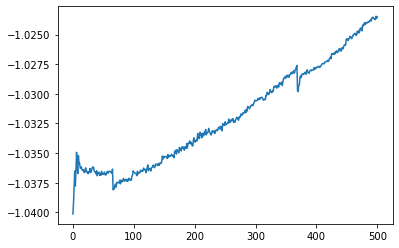

  0%|          | 0/1500 [00:00<?, ?it/s]

15


  0%|          | 0/501 [00:00<?, ?it/s]

-1.0265014476095045
-1.0308068957272276
-1.029882975895428
-1.0301246608786463
-1.0307055138548105
-1.03038151102703


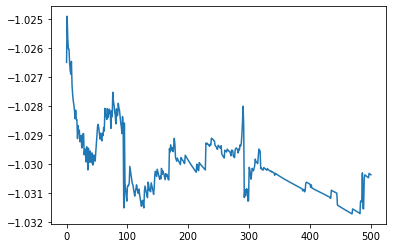

  0%|          | 0/1600 [00:00<?, ?it/s]

16


  0%|          | 0/501 [00:00<?, ?it/s]

-0.8906782498723347
-0.9457863048224125
-0.9768999124512205
-0.9838542195563964
-0.9880663597077203
-0.9854483482677219


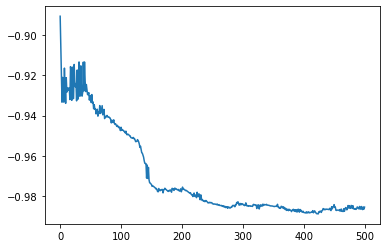

  0%|          | 0/1700 [00:00<?, ?it/s]

17


  0%|          | 0/501 [00:00<?, ?it/s]

-1.0366406679461948
-1.077429246729427
-1.0725114721224267
-1.0684452131320525
-1.064664424596981
-1.0670755891843762


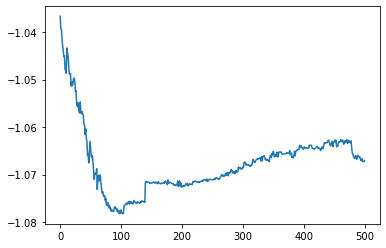

  0%|          | 0/1800 [00:00<?, ?it/s]

18


  0%|          | 0/501 [00:00<?, ?it/s]

-1.006847351933976
-1.0121974510969856
-1.0129229061558076
-1.0146442645189662
-1.0171139661647124
-1.0086878711687952


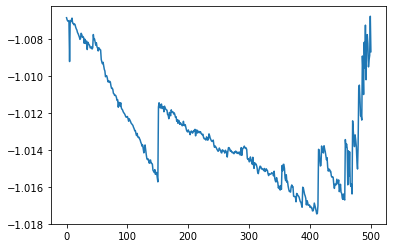

  0%|          | 0/1900 [00:00<?, ?it/s]

19


  0%|          | 0/501 [00:00<?, ?it/s]

-1.0174861598014724
-1.0139912169399203
-1.0116707764479274
-1.0115808732190377
-1.0092259303612496
-1.007202584099465


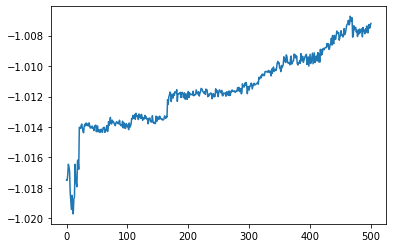

  0%|          | 0/2000 [00:00<?, ?it/s]

In [4]:
@jax.jit
def loop(s, schedule_t):
    a = policy_net.apply(theta, mdp.observe(s)[None, ...])[0]
    a = schedule_t + a[0] #* a[1] + a[0]
    s = mdp.step(s, a)
    v = value_net.apply(phi, mdp.observe(s)[None, ...])[0]
    return s, v

prefix = np.zeros((0, 6))

key = jax.random.PRNGKey(0)
s = mdp.init()
for z in range(20):
    print(z)
    key, subkey = jax.random.split(key)
    # schedule = np.zeros((100, 6))
    schedule = jax.random.normal(subkey, shape=(100, 6)) * 0.01
    
    opt = optax.sgd(10.0)
    opt_state = opt.init(schedule)

    cs = []
    for t in tqdm(range(500 + 1)):
        (c, s_), dc = dcost(schedule, s, z)
        if t % 100 == 0:
            print(c)
        cs.append(c)
        opt_updates, opt_state = opt.update(dc, opt_state)
        schedule = optax.apply_updates(schedule, opt_updates)
    (c, s_), dc = dcost(schedule, s, z)
    plt.figure()
    plt.plot(cs)
    plt.show()
    prefix = np.concatenate([prefix, schedule])
    s = s_
    
    s = mdp.init()
    for t in tqdm(range(len(prefix))):
        s, v = loop(s, prefix[t])

In [5]:
os.system('rm out/*.png')

schedule = prefix

vs = []
s = mdp.init()
for t in tqdm(range(len(schedule))):
    if t % 2 == 0:
        draw(
            jax.device_get(s),
            t,
            f'out/{t:09}',
            msg=f'boom-{int(bounds[0] * 500)}' if bounds[0] < t/500 < bounds[1] else ''
        )
    s, v = loop(s, schedule[t])
    vs.append(v)

  0%|          | 0/2000 [00:00<?, ?it/s]

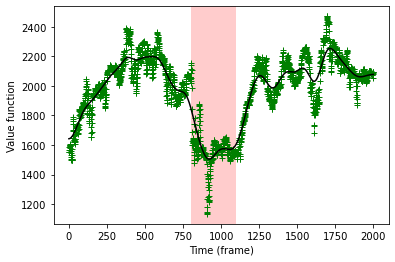

In [6]:
import scipy.ndimage
plt.plot(vs, 'g+')
plt.plot(scipy.ndimage.gaussian_filter(vs, 40), 'k-')
plt.xlabel('Time (frame)')
plt.ylabel('Value function')
plt.axvspan(bounds[0] * 500, bounds[1] * 500, facecolor='r', alpha=0.2)
    
os.system(f'''../../ffmpeg-git-20220722-i686-static/ffmpeg -hide_banner -loglevel error -framerate 60 -y -pattern_type glob -i 'out/*.png' -c:v libx264 -pix_fmt yuv420p out-mime-story-reel.mp4''')
display(Video(f'out-mime-story-reel.mp4', html_attributes='controls loop autoplay'))

ns.notify(f':banana:')

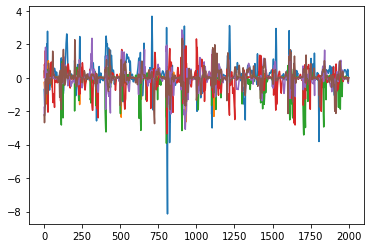

In [7]:
plt.plot(schedule)